# $^{83m}Kr$ LCE Maps: Pax
_Ted Berger, Dan Alexander; July 27, 2016

In [1]:
from xerawdp_helpers import *    # helper functions for retrieving xerawdp data
from Kr83m_Basic import *        # pax minitree class for Kr83m data
from cut_helpers import *        # functions to apply and plot some event selections
from lce_helpers import *        # functions for binning, building map files, and plotting LCE maps

import numpy as np
import pandas as pd
import glob

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
matplotlib.rc('font', size=16)

import hax
hax.init(main_data_paths=['/home/berget2/scratch-midway/paxProcessed_kr83mDiffusion'])

#hax.ipython.code_hider()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# Table of Contents
[1 - Introduction](#introduction)  
[2 - Data and Event Selection](#data_and_selection)  
[3 - LCE Maps](#lce_maps)  
[4 - Next Steps: Xenon1T](#next_steps)  
[5 - References](#references) 

<a id='data_and_selection'></a>
# Data and Event Selection

In [2]:
# datasets processed by pax_4.1.2
datasets_pax = ['xe100_150413_1839','xe100_150414_1535','xe100_150415_1749',
                'xe100_150416_1832','xe100_150419_1611','xe100_150420_0304',
                'xe100_150420_1809']

for i in range(len(datasets_pax)):
    datasets_pax[i]+='_pax4.9.1'

# load minitrees
# throws error when building minitrees for many datasets, I built them one by one

data = hax.minitrees.load(datasets_pax, treemakers=Kr83m_Basic)
df_pax = pd.DataFrame(data[data['s10Time']>=0]) # remove NaNs

Don't know a run named xe100_150413_1839_pax4.9.1, trying to find it anyway...
Don't know a run named xe100_150414_1535_pax4.9.1, trying to find it anyway...
Don't know a run named xe100_150415_1749_pax4.9.1, trying to find it anyway...
Don't know a run named xe100_150416_1832_pax4.9.1, trying to find it anyway...
Don't know a run named xe100_150419_1611_pax4.9.1, trying to find it anyway...
Don't know a run named xe100_150420_0304_pax4.9.1, trying to find it anyway...
Don't know a run named xe100_150420_1809_pax4.9.1, trying to find it anyway...


The xerawdp data is from Luca Scotto's re-processing to remove more noisy PMT's and adjust the NN reconstruction (20 datasets total, see code for details). The pax data is from a partial processing of the $^{83m}Kr$ data and includes 7 datasets (pax v4.9.1, and again see code for dataset details).

Xerawdp Data Path | Pax Data Path
------------------|--------------
/project/lgrandi/tunnell/run_14/NewNN/ | /project/lgrandi/tunnell/run_14/paxProcessed_kr83mDiffusion/
$$ \textbf{Table 1: }\text{Paths to data on midway }$$

Event selection has been broken into 2 parts; processed data is required to meet **restrictions** which guarantee the existence of the information necessary to apply other $^{83m}Kr$ selections, and **selections** which produce the final event selections. The goal is that only the restrictions differ between xerawdp and pax.

In [3]:
# acceptance after restrictions

print(len(df_pax.values)/len(data.values))

0.33289874101349304


In [4]:
# Add some colums to dataframes for easy cut comparison
for df in [df_pax]:
    df['s1Dt'] = df['s11Time']-df['s10Time']
    df['s1Gap'] = df['s11LeftEdge']-df['s10RightEdge']
    df['s20Width'] = df['s20RightEdge']-df['s20LeftEdge']
    df['s1sSpan'] = df['s11RightEdge']-df['s10LeftEdge']
    df['s1s2Deficit'] = df['s20Width']-df['s1sSpan']
    df['s1sRatio'] = df['s11Area']/df['s10Area']

In [5]:
cuts = [ ['s10Coin',2,'none',50,0,100,'channels'],
         ['s11Coin',2,'none',50,0,100,'channels'],
         ['s20Area',150,'none',50,0,30000,'PE'],
         ['s1Gap',0,'none',50,-5000,5000,'ns'],
         ['s21Area','none',150,50,0,20000,'PE'],
         ['s1s2Deficit',0,'none',50,-5000,5000,'ns'],
         ['s1Dt',500,1000,50,-1000,5000,'ns'],
         ['s1sRatio',0.1,1.0,50,0,1.2,'PE/PE']]

In [6]:
df_pax_cut = apply_cuts(df_pax,cuts)
print(len(df_pax_cut.values))

176032


In [ ]:
h_xy_pax = ROOT.TH2D('','',50,-16,16,50,-17,17)
for i in range(len(df_pax_cut.values)):
    h_xy_pax.Fill(df_pax_cut['i0x'].values[i],df_pax_cut['i0y'].values[i])

In [ ]:
c1 = ROOT.TCanvas('','',1600,1200)
ROOT.gStyle.SetOptStat(0)

c1.SetLogz
h_xy_pax.GetXaxis().SetTitle('x (cm)')
h_xy_pax.GetXaxis().CenterTitle()
h_xy_pax.GetYaxis().SetTitle('y (cm)')
h_xy_pax.GetYaxis().CenterTitle()
h_xy_pax.SetTitle('Pax x vs. y Histogram')
h_xy_pax.SetMaximum(3e2)
h_xy_pax.Draw('colz')

c1.Print('./KrLce_Figures/f_xyHists.png')
c1.Clear()

plt.rcParams['figure.figsize'] = (10.0, 10.0)  

plt.imshow(mpimg.imread('KrLce_Figures/f_xyHists.png'))
plt.axis('off')
plt.show()

In [ ]:
h_rrz_pax = ROOT.TH2D('','',50,0,280,50,5,-35)

for i in range(len(df_pax_cut.values)):
    rr = df_pax_cut['i0x'].values[i]**2+df_pax_cut['i0y'].values[i]**2
    h_rrz_pax.Fill(rr,df_pax_cut['i0z'].values[i])

In [ ]:
c1 = ROOT.TCanvas('','',1600,1200)
ROOT.gStyle.SetOptStat(0)
c1.SetLogz
h_rrz_pax.GetXaxis().SetTitle('r^{2} (cm^{2})')
h_rrz_pax.GetXaxis().CenterTitle()
h_rrz_pax.GetYaxis().SetTitle('z (cm)')
h_rrz_pax.GetYaxis().CenterTitle()
h_rrz_pax.SetTitle('Pax\ r^{2}\ vs.\ z\  Histogram')
h_rrz_pax.SetMaximum(3e2)
h_rrz_pax.Draw('colz')

c1.Print('./KrLce_Figures/f_rrzHists.png')
c1.Clear()

plt.rcParams['figure.figsize'] = (10.0, 10.0)  

plt.imshow(mpimg.imread('KrLce_Figures/f_rrzHists.png'))
plt.axis('off')
plt.show()

In [ ]:
h_z_pax = ROOT.TH1D('','',50,-35,5)
    
for i in range(len(df_pax_cut.values)):
    h_z_pax.Fill(df_pax_cut['i0z'].values[i])

In [ ]:
c1 = ROOT.TCanvas('','',1600,1200)
ROOT.gStyle.SetOptStat(0)

c1.SetLogz

h_z_pax.GetXaxis().SetTitle('z (cm)')
h_z_pax.GetXaxis().CenterTitle()
h_z_pax.SetTitle('Pax z Histogram')
h_z_pax.SetMaximum(6e3)
h_z_pax.Draw()

c1.Print('./KrLce_Figures/f_zHists.png')
c1.Clear()

plt.rcParams['figure.figsize'] = (10.0, 10.0)  

plt.imshow(mpimg.imread('KrLce_Figures/f_zHists.png'))
plt.axis('off')
plt.show()

In [ ]:
h_s1s_pax = ROOT.TH2D('','',50,0,280,50,0,120)

for i in range(len(df_pax_cut.values)):
    h_s1s_pax.Fill(df_pax_cut['s10Area'].values[i],df_pax_cut['s11Area'].values[i])

In [ ]:
c1 = ROOT.TCanvas('','',1600,1200)
ROOT.gStyle.SetOptStat(0)
c1.SetLogz

h_s1s_pax.GetXaxis().SetTitle('s10Area (PE)')
h_s1s_pax.GetXaxis().CenterTitle()
h_s1s_pax.GetYaxis().SetTitle('s11Area (PE)')
h_s1s_pax.GetYaxis().CenterTitle()
h_s1s_pax.SetTitle('Pax s10Area vs. s11Area Histogram')
h_z_pax.SetMaximum(5e3)
h_s1s_pax.Draw('colz')

c1.Print('./KrLce_Figures/f_s1sHists.png')
c1.Clear()

plt.rcParams['figure.figsize'] = (10.0, 10.0)  

plt.imshow(mpimg.imread('KrLce_Figures/f_s1sHists.png'))
plt.axis('off')
plt.show()

In [ ]:
h_dt_pax = ROOT.TH1D('','',70,400,1100)

for i in range(len(df_pax_cut.values)):
    h_dt_pax.Fill(df_pax_cut['s1Dt'].values[i])

In [ ]:
def expDec(x,p):
    f = p[2]+p[0]*np.exp(-np.log(2)*x[0]/p[1])
    return f

In [ ]:
fitFun = ROOT.TF1("fitFun",expDec,500,1000,3)
fitFun.SetParameter(0,200000)
fitFun.SetParameter(1,155)
fitFun.SetParameter(2,10)

c1 = ROOT.TCanvas('','',1600,1200)
ROOT.gStyle.SetOptStat(0)

c1.SetLogy()
h_dt_pax.GetXaxis().SetTitle('s11Time - s10Time (ns)')
h_dt_pax.GetXaxis().CenterTitle()
h_dt_pax.SetTitle('Pax s1Dt Histogram')
h_dt_pax.SetMaximum(2e4)
h_dt_pax.Draw()
h_dt_pax.Fit("fitFun","","",500,1000)
fit2 = h_dt_pax.GetFunction("fitFun")
chi22 = fit2.GetChisquare()
ndf2 = fit2.GetNDF()
p12 = fit2.GetParameter(1)
e12 = fit2.GetParError(1)
pt2 = ROOT.TPaveText(.58, .68, .88, .88, 'NDC')
pt2.AddText("t_{1/2}=%1.3f"%p12)
pt2.AddText("#sigma=%1.3f"%e12)
pt2.AddText("#chi^{2}/NDF=%1.3f/%i"%(chi22,ndf2))
pt2.Draw()

c1.Print('./KrLce_Figures/f_dtHists.png')
c1.Clear()

plt.rcParams['figure.figsize'] = (15.0, 15.0)  

plt.imshow(mpimg.imread('KrLce_Figures/f_dtHists.png'))
plt.axis('off')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)  

plt.imshow(mpimg.imread('KrLce_Figures/f_xyHists.png'))
plt.title('Fig 9: $x\ vs.\ y$ Histograms')
plt.axis('off')
plt.show()

plt.imshow(mpimg.imread('KrLce_Figures/f_rrzHists.png'))
plt.title('Fig 10: $r^2\ vs.\ z$ Histograms')
plt.axis('off')
plt.show()

plt.imshow(mpimg.imread('KrLce_Figures/f_s1sHists.png'))
plt.title('Fig 11: $s10Area\ vs.\ s11Area$ Histograms')
plt.axis('off')
plt.show()

plt.imshow(mpimg.imread('KrLce_Figures/f_dtHists.png'))
plt.title('Fig 12: $s1Dt$ Histograms')
plt.axis('off')
plt.show()

<a id='lce_maps'></a>
# LCE Maps

In [7]:
R = 15.25
Z = -30.3
A_r = [R/5, 2*R/5, 3*R/5, 4*R/5, R]
N_phi = [10, 15, 20, 40, 60]
N_z = 10.0
bin_settings = [R,Z,A_r,N_phi,N_z]

In [8]:
bin_data_s10_pax = xe100_to_lyBins(df_pax_cut,bin_settings,'s10',bin_spec_dir='Bin_Hists_s10_pax') # for Pax

In [14]:
def bins_to_plot2(bin_dict, peak, bin_settings, outfile, diff = False):
    if False:
        x=1
    else:     
        df = pd.DataFrame(bin_dict)
        dummyH_list=[]

        c1 = ROOT.TCanvas( '','', 2400, 3200 ) 
        ROOT.gStyle.SetOptStat(0)
        c1.Divide(3,4,0.02,0.02)

        z_hists = []
        
        max_ly = max(df['ly'])
        min_ly = min(df['ly'])

        for z_i in range(int(bin_settings[4])):
            dummyH_list.append(ROOT.TH2D("","",100,-1*bin_settings[0],bin_settings[0],100,-1*bin_settings[0],bin_settings[0]))

            df_new = df[ df['z_i'] == z_i ]
            r_hists = []
            for r_i in range(len(bin_settings[2])):
                r_hists.append(ROOT.TH2D('','', bin_settings[3][r_i], 0, 2*np.pi, len(bin_settings[2]), 0, bin_settings[0]))
                df_newer = df_new[ df_new['r_i'] == r_i ]
                for i in range(len(df_newer)):
                    r_hists[r_i].Fill(df_newer['phi'].values[i], df_newer['r'].values[i],
                                    df_newer['ly'].values[i] )

            z_hists.append(r_hists)

            c1.cd(z_i+1)

            dummyH_list[z_i].Draw('colz')
            dummyH_list[z_i].SetTitle("%.2fcm < z < %.2fcm" %(z_i*3.03, (z_i+1)*3.03 ))
            dummyH_list[z_i].GetZaxis().SetTitle("<s1Area>")
            dummyH_list[z_i].GetXaxis().SetTitle("x position [cm]")
            dummyH_list[z_i].GetXaxis().CenterTitle()
            dummyH_list[z_i].GetYaxis().SetTitle("y position [cm]")
            dummyH_list[z_i].GetYaxis().CenterTitle()

        #     c1.SetTopMargin(0.2)
            c1.SetRightMargin(0.2)

            for i in range(len(z_hists[z_i])):

                z_hists[z_i][i].GetZaxis().SetRangeUser(0, max_ly)
                if diff:
                    z_hists[z_i][i].GetZaxis().SetTitle("(pax_ly - xerawdp_ly)^{2} [pe/keV]")
                else:
                    z_hists[z_i][i].GetZaxis().SetTitle(peak + " ly [pe/keV]")
                z_hists[z_i][i].GetZaxis().SetTitleOffset(1.8)
                z_hists[z_i][i].Draw('pol colz a same') 

        c1.Print(outfile)
        c1.Clear()
        return

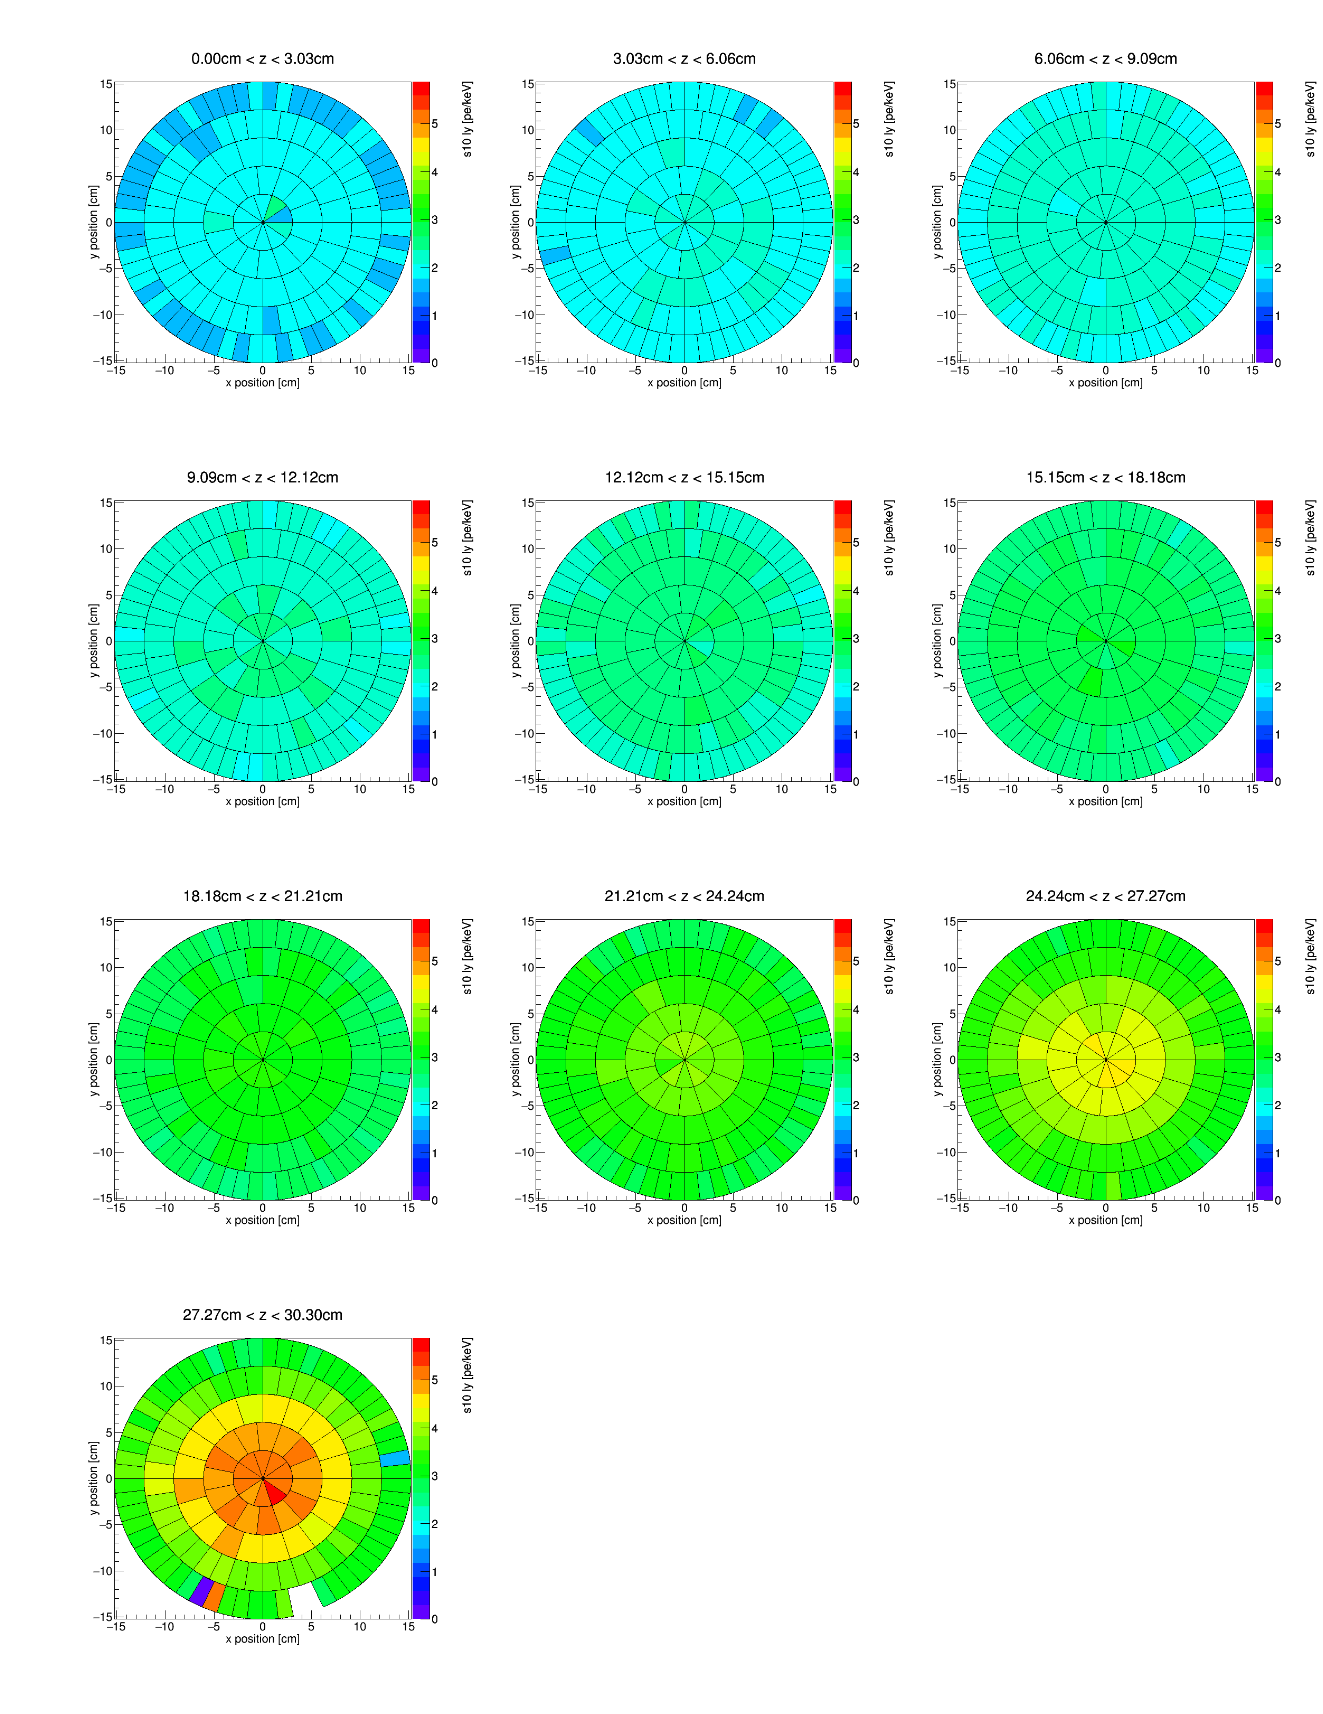

In [15]:
bins_to_plot2(bin_data_s10_pax, 's10', bin_settings, 'pax_s10_maps.png')

plt.rcParams['figure.figsize'] = (30.0, 30.0)  

plt.imshow(mpimg.imread('pax_s10_maps.png'))
plt.axis('off')
plt.show()

We begin with the same binning originally used by Cecilia for the $^{137}Cs$ LCE maps and again by Richard for the $^{83m}Kr$ LCE maps in Xerawdp. For each of these bins, we pull the mean S1 area from a Gaussian fitted to data. Figure 13 shows some examples of the S1 spectra that are used to extract LY values.

In [ ]:
fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(mpimg.imread('Bin_Hists_s11_xerawdp/f_s11_z0_r0_phi5.png'))
plt.title('Fig 13a: Xerawdp S11 Spectra for a Single Top Bin')
plt.axis('off')
b = fig.add_subplot(1,2,2)
plt.imshow(mpimg.imread('Bin_Hists_s11_pax/f_s11_z0_r0_phi5.png'))
plt.title('Fig 13b: Pax S11 Spectra for a Single Top Bin')
plt.axis('off')
plt.show()

fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(mpimg.imread('Bin_Hists_s11_xerawdp/f_s11_z5_r4_phi29.png'))
plt.title('Fig 14a: Xerawdp S11 Spectra for a Single Middle Bin')
plt.axis('off')
b = fig.add_subplot(1,2,2)
plt.imshow(mpimg.imread('Bin_Hists_s11_pax/f_s11_z5_r4_phi29.png'))
plt.title('Fig 14b: Pax S11 Spectra for a Single Middle Bin')
plt.axis('off')
plt.show()

fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(mpimg.imread('Bin_Hists_s11_xerawdp/f_s11_z9_r2_phi5.png'))
plt.title('Fig 15b: Xerawdp S11 Spectra for a Single Bottom Bin')
plt.axis('off')
b = fig.add_subplot(1,2,2)
plt.imshow(mpimg.imread('Bin_Hists_s11_pax/f_s11_z9_r2_phi5.png'))
plt.title('Fig 15b: Pax S11 Spectra for a Single Bottom Bin')
plt.axis('off')
plt.show()

From here we are able to produce the LCE maps for the data processed by Xerawdp and Pax. Figure 14 and 15 show these LCE maps together with the absolute value of their differences for the $32\ keV$ and $9\ keV$ signals respectively. Note: the positions used to determine the appropriate bin are pulled from the first s2/interaction regardless of whether we consider the $32\ keV$ or $9\ keV$ signal.

<img src="f_lceMap_s10.png">
$$\textbf{Figure 14: }\text{LCE Maps for the }32\ keV\text{ signal of }^{83m}Kr$$  

<img src="f_lceMap_s11.png">
$$\textbf{Figure 15: }\text{LCE Maps for the }9\ keV\text{ signal of }^{83m}Kr$$  

<a id='next_steps'></a>
# Next Steps: Xenon1T

<a id='references'></a>
# References

[[1] S. -C. Wu, Nuclear Data Sheets 92, 893 (2001)](nucleardatasheets_a83.pdf)  